In [2]:
import pIMOS.xrwrap.SEABIRD_37_39_56 as wrap_sbd
from pIMOS.xrwrap.NORTEK_VECTOR import NORTEK_VECTOR, num2date_lk
from pIMOS.xrwrap.NORTEK_SIGNATURE import NORTEK_SIGNATURE

import os
import xarray as xr
import matplotlib.pyplot as plt
import datetime
import numpy as np 
import pandas as pd
import glob

import pIMOS.utils.quality_control as pqc
import importlib

# O Drive is //drive.irds.uwa.edu.au/CEME-BBL-001
# pIMOS_export_dir = r'O:\Data\pIMOS\KISSME'

project_root = r'G:\Experiments\kissme17'
archive_dir_01 = os.path.join(project_root, 'archive_FV00') 
archive_dir_02 = os.path.join(project_root, 'archive_FV02') 
dbconfig_file = os.path.join(project_root, 'database', 'config.txt') 

for archive_dir in [archive_dir_01, archive_dir_02]:
    if not os.path.exists(archive_dir):
        os.mkdir(archive_dir)

# Nortek Vector

In [ ]:
rr = NORTEK_VECTOR(r'G:\Experiments\kissme17\Archive_FV00\Nortek Vector', r'6019_6019.VEC.nc', driver='xarray')
importlib.reload(pqc)
pqc.pimosEchoIntensitySimpleQC(rr, 60)

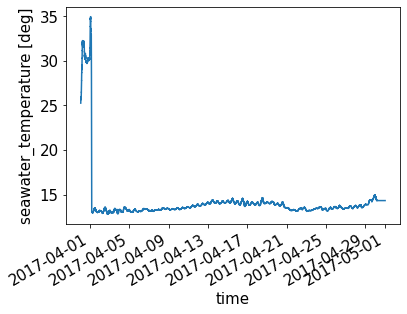

In [38]:
nortek_vector_dir =  os.path.join(archive_dir, 'Nortek Vector') 
# ds = xr.open_dataset(os.path.join(nortek_vector_dir, '6019_601903.VEC.nc'))
ds = xr.open_dataset(os.path.join(nortek_vector_dir, '6019_6019.VEC.nc'))
ds.temperature.plot()


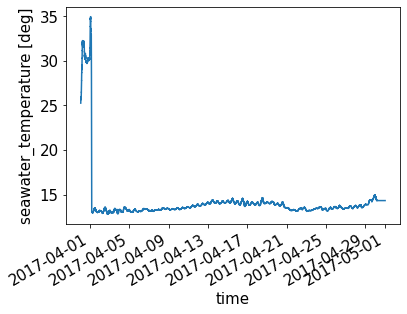

In [39]:
nortek_vector_dir =  os.path.join(archive_dir, 'Nortek Vector') 
# ds = xr.open_dataset(os.path.join(nortek_vector_dir, '6019_601903.VEC.nc'))
ds_6329 = xr.open_dataset(os.path.join(nortek_vector_dir, '6329_6329.VEC.nc'))
ds_6329.temperature.plot()


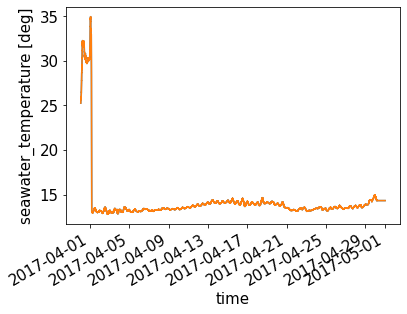

In [40]:
ds_6329.temperature.plot()
ds.temperature.plot()


# Nortek Signature

In [20]:
nortek_signature_dir =  os.path.join(archive_dir, 'Signature 1000') 
ds = xr.open_dataset(os.path.join(nortek_signature_dir, '100460_[2800000-3200000].nc'))
ds

<xarray.Dataset>
Dimensions:                   (beam: 5, cartesian_axes: 3, height: 115, time: 400000)
Coordinates:
  * beam                      (beam) int32 1 2 3 4 5
  * cartesian_axes            (cartesian_axes) int32 1 2 3
  * height                    (height) float64 0.1 0.3 0.5 ... 22.5 22.7 22.9
  * time                      (time) datetime64[ns] 2017-04-04T02:13:20.06329...
Data variables: (12/20)
    vel_dolfyn                (beam, height, time) float32 ...
    vel_enu                   (cartesian_axes, height, time) float64 ...
    vel_xyz                   (cartesian_axes, height, time) float64 ...
    four_beam_error_velocity  (height, time) float64 ...
    pressure                  (time) float32 ...
    temperature               (time) float32 ...
    ...                        ...
    cell                      (height) int32 ...
    qc_velocity               (beam, height, time) float32 ...
    qc_temperature            (time) float32 ...
    qc_pressure               (time) float32 ...
    qc_compass                (time) float32 ...
    qc_tilt                   (time) float32 ...
Attributes: (12/40)
    config:SerialNum:                          100460
    config:SerialNum_b5:                       100460
    config:fs:                                 8
    config:blanking:                           0.1
    config:blanking_b5:                        0.1
    config:cell_size:                          0.2
    ...                                        ...
    nominal_site_depth:                        -252.0
    nominal_instrument_height_asb:             0.35
    nominal_instrument_orientation:            nan
    timezone:                                  UTC
    instrument_model:                          Signature 1000
    instrument_serial_number:                  100460

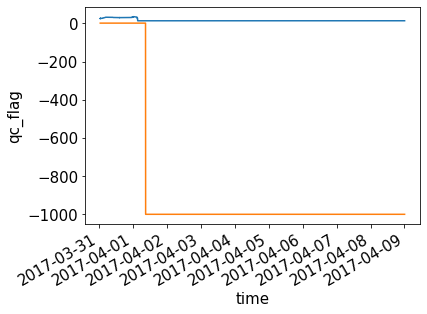

In [34]:
ds.temperature.plot()


[[-0.068 -0.014 -0.135 ... -0.059 -0.072 -0.019]
 [-0.08  -0.083 -0.037 ... -0.204 -0.126 -0.011]
 [-0.052 -0.051 -0.024 ... -0.025 -0.102 -0.102]
 ...
 [ 0.082 -0.008 -0.132 ... -0.071  0.026 -0.123]
 [ 0.109 -0.472  0.071 ... -0.089 -0.016 -0.115]
 [ 0.146  0.05   0.077 ...  0.013 -0.021  0.007]]


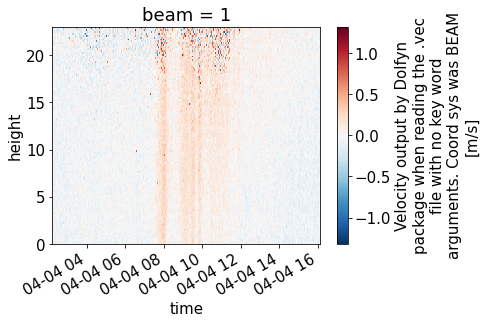

In [30]:
print(ds.vel_dolfyn[0, :, :].values)
ds.vel_dolfyn[0, :, :].plot()

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


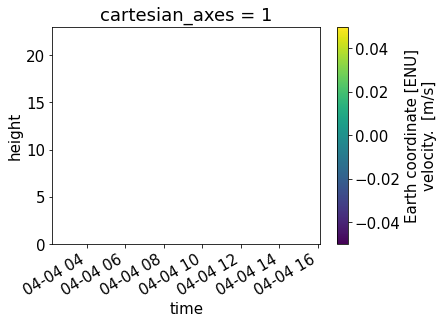

In [31]:
print(ds.vel_enu[0, :, :].values)
ds.vel_enu[0, :, :].plot()